#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# About Features

1. **Employee ID**: A unique identifier for each employee. Usually a numeric or alphanumeric code.

2. **Name**: The full name of the employee. This might be split into first and last names in some datasets.

3. **Department**: The department or division within the organization where the employee works.

4. **Job Title**: The official title or position held by the employee in the organization.

5. **Salary**: The amount of money the employee earns. This could be represented as an annual salary, hourly wage, or monthly pay.

6. **Hire Date**: The date when the employee started working at the organization. Useful for calculating tenure or experience.

7. **Gender**: The gender of the employee. This might be included in some datasets for diversity and equality analysis.

8. **Years of Experience**: The total number of years the employee has worked in their field or profession.

9. **Education Level**: The highest level of education attained by the employee, such as a high school diploma, bachelor's degree, etc.

10. **Performance Rating**: If available, this could be a measure of the employee's performance in their role, often based on annual review scores.

11. **Location**: The geographical location or office where the employee works, if the organization has multiple locations.



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [8]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/SalariesX.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco


In [9]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')

**Basic Data Exploration**

*   Identify the number of rows and columns in the datase



In [12]:
df.shape
f'The number of rows = {df.shape[0]} and the number of columns = {df.shape[1]}'

'The number of rows = 99327 and the number of columns = 12'


*   data types of each column



In [15]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
dtype: object



*   missing values in each column



In [40]:
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay                10
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                1
TotalPayBenefits        1
Year                    1
Notes               99327
Agency                  1
dtype: int64

**Descriptive Statistics**


*   Calculate mean, median, mode, minimum, and maximum salary



In [27]:
print('The salary mean =', df.BasePay.mean()) # mean
print('The salary median =', df.BasePay.median()) # median
print('The salary mode =', df.BasePay.mode()) # mode
print('The salary minumum value =', df.BasePay.min()) # minmum value
print('The salary maximum value =', df.BasePay.max()) # maximum value

The salary mean = 71486.33672392441
The salary median = 68358.21
The salary mode = 0    0.0
Name: BasePay, dtype: float64
The salary minumum value = -166.01
The salary maximum value = 319275.01




*   Range of salary and standard deviation



In [34]:
range = df.BasePay.max() - df.BasePay.min() # range
print('The salary range =', range)

print('The standard deviation for salary =', df.BasePay.std()) # std

The salary range = 319441.02
The standard deviation for salary = 40919.248411307555


**Data Cleaning**
*   Handle missing data.



1.  The column Notes have 99327 missing value which is the same as rows number thus I decided to drop this column entirly because the missing data is large and this will not useful.
2.   BasePay and Benefits based on TotalPays and TotalBenefits the NAN values will be zero.
3. there are some 'Not Provided' which like NAN so I will remove it.
4. I will drop the Id column which is not useful.
5. for record which Id 99327 I will replace the year with 2013 and Agency to be San Francisco to follow the others and I will calculate the TotalPay.
6. I will edit the negative salary to be zero.
7. I will cast the year to be int not float.


In [46]:
df.drop(columns=['Notes','Id'],inplace=True) # drop Notes and Id column

In [48]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay                10
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                1
TotalPayBenefits        1
Year                    1
Agency                  1
dtype: int64

In [49]:
df.fillna(value=0,inplace=True) # fill nan values from TotalPays and TotalBenefits with zero.

In [61]:
row_index = 99326
df.loc[row_index, ["Agency", "Year"]] = ["San Francisco", 2013.0]

pay_columns = ["BasePay", "OvertimePay", "OtherPay", "Benefits"]
df.loc[row_index, "TotalPay"] = df.loc[row_index, pay_columns].sum()
df.loc[row_index, "TotalPayBenefits"] = df.loc[row_index, "TotalPay"] - df.loc[row_index, "Benefits"]
# Calculate the TotalPays and TotalBenefits using the formula above.

In [63]:
df["Year"] = df["Year"].astype(int) # Casting the year column from float to int.

In [66]:
df = df[(df['EmployeeName'] != 'Not provided') & (df['JobTitle'] != 'Not provided')].reset_index(drop=True) # remove not provided from employee name or job title.

In [70]:
to_correct = ['BasePay', 'OvertimePay', 'OtherPay','TotalPay', 'TotalPayBenefits']
df[to_correct] = df[to_correct].apply(lambda col: np.maximum(col, 0))
df.describe()
# Remove negative pays>.

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,99327.000000,99327.000000,99327.000000,99327.000000,99327.000000,99327.000000,99327.000000
mean,71479.149331,5461.796935,4003.487792,18286.852109,80944.575875,99230.981732,2011.901769
std,40923.457539,11843.347205,8485.266124,17469.863520,48582.828313,59566.158225,0.787531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,48472.400000,0.000000,0.000000,0.000000,52312.055000,59582.565000,2011.000000
50%,68358.030000,40.650000,1064.040000,22882.520000,76376.680000,96965.350000,2012.000000
75%,98337.830000,5436.175000,4808.470000,33427.620000,110375.520000,134753.050000,2013.000000
max,319275.010000,245131.880000,400184.250000,86533.210000,567595.430000,567595.430000,2013.000000


**Basic Data Visualization**

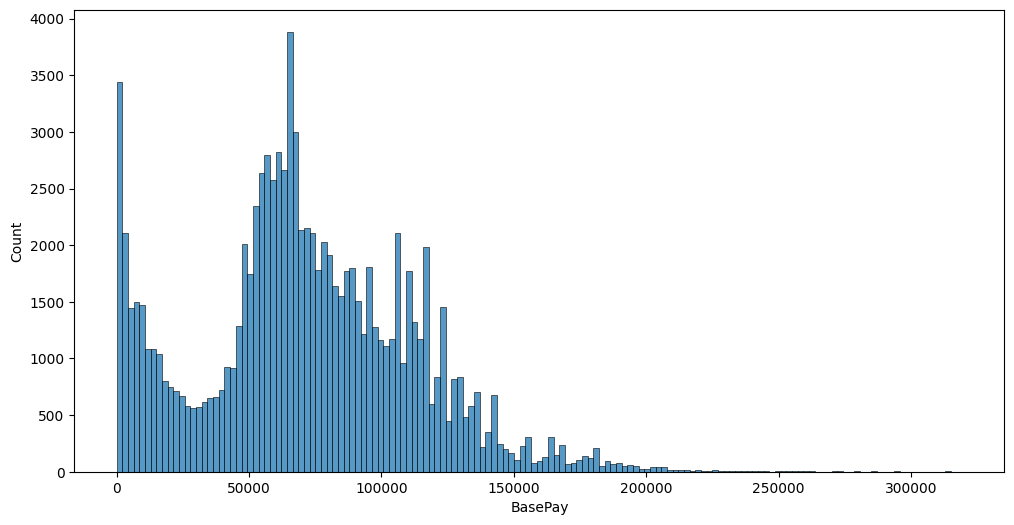

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create the histogram plot
sns.histplot(data=df, x="BasePay")

# Show the plot
plt.show()

In [82]:
df_value_counts = df['JobTitle'].str.lower().value_counts().head(10).reset_index()
df_value_counts.columns = ['Job Title', 'Number of people in that job']
df_value_counts['Job Title'] = df_value_counts['Job Title'].str.capitalize()
values_column = df_value_counts.loc[:,'Number of people in that job']
values = values_column.values
df_value_counts

,Job Title,Number of people in that job
0,Transit operator,6423
1,Registered nurse,3647
2,Special nurse,3121
3,Firefighter,2284
4,Custodian,2207
5,Deputy sheriff,1965
6,Police officer 3,1592
7,Recreation leader,1319
8,Attorney (civil/criminal),1089
9,General laborer,983


In [83]:
import plotly.express as px

px.pie(df_value_counts, values=values, names='Job Title').show()

In [93]:
grouped_data = df.groupby('JobTitle')['TotalPay'].mean().reset_index()

# Convert the grouped data to a DataFrame
grouped_df = pd.DataFrame(grouped_data)

# Display the grouped DataFrame with average salaries for each JobTitle
grouped_df.min()


JobTitle    ACCOUNT CLERK
TotalPay           149.51
dtype: object

          BasePay  TotalPay
BasePay   1.00000   0.94564
TotalPay  0.94564   1.00000


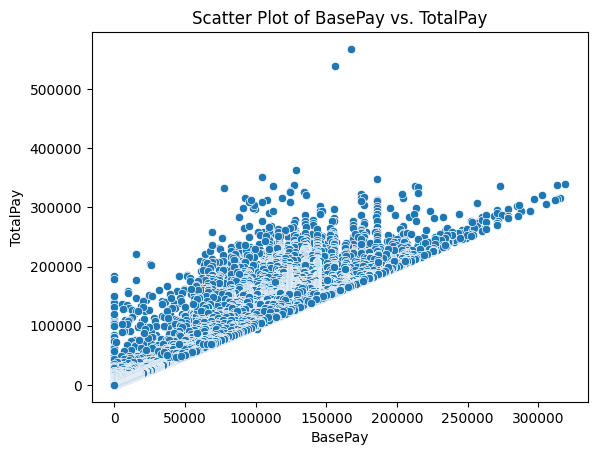

In [90]:
correlation_data = df[['BasePay', 'TotalPay']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the relationship with a scatter plot
sns.scatterplot(x='BasePay', y='TotalPay', data=df)
plt.title('Scatter Plot of BasePay vs. TotalPay')
plt.show()

**Report**

from above I have reached to some insights:

At first, you may notice an error in the year type, and then you find negative values in the salaries, and you take this into account to address it in the data cleaning stage.

In the cleaning phase, as I explained previously, I got rid of the columns in which there were a lot of NAN, and then I processed the rest of the values. I also changed the type of the year column from a decimal point to an integer.

When drawing the histogram, I noticed that it does not follow the normal distribution, but is skewed to the right.

When drawing the paychart in the beginning, it was not enough due to the large numbers, so I only put the 10 most important professions, and then I calculated the values and found that Transit operator was the largest with a rate of 26.1%, and the least was General Labore with a rate of 3.99%.

When grouping the data I chose JobTitle with TotalPay and the highest average was for ZOO CURATOR With about 399,211.275 and the lowest ACCOUNT CLERK average with about 149.51.

As for the correlation matrix, I found that the correlation between BasePay and TotalPay is positive, meaning that the more a person’s income in Base, the greater the total.

